In [72]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import openpyxl

In [89]:
df = pd.read_csv('data_index.csv')

In [90]:
df.head(5)

,論文,entry,R1-,R2,organocatalyst,organocatalyst(mol%),under,temp(℃),time(h),Cu(OAc)2(mol%),AcOH(mol%),収率(%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ol301095j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.insert(3, 'R1-img', '')
df.insert(6, 'organocatalyst-img', '')

In [92]:
df.head()

,論文,entry,R1-,R1-img,R2,organocatalyst,organocatalyst-img,organocatalyst(mol%),under,temp(℃),time(h),Cu(OAc)2(mol%),AcOH(mol%),収率(%)
0,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ol301095j,NaN,NaN,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
file_name = 'data_index.xlsx'

In [94]:
df.to_excel(file_name, index=False)

In [95]:
wb = openpyxl.load_workbook(file_name)

In [96]:
ws = wb.active # active なsheet

In [97]:
def toImgFromSmiles(smiles, name):
    mol = Chem.MolFromSmiles(smiles)
    return Draw.MolToFile(mol, f'./imgs/{name}.png', size=(300, 300))
    # return Draw.MolsToGridImage([mol])


In [98]:
# from PIL import Image
# img = Image.open('./imgs/C10.png')

In [99]:
from openpyxl.drawing.image import Image as XLImage

def image_column(worksheet, smiles_column, image_column):
    ws = worksheet
    # 行数を取得
    R_NUM = len(list(ws.rows))

    # 画像貼り付け
    # 行番号は1始まり。1行目はヘッダなので飛ばす
    for i in range(1, R_NUM):
        idx = i + 1
        smiles_col_name = smiles_column + str(idx)
        cell_name = image_column + str(idx)
        smiles = ws[smiles_col_name].value
        if smiles in [None, '-']: continue
        print(smiles)

        try:
            # 画像ファイルのロード
            toImgFromSmiles(smiles, smiles_col_name)
            img = XLImage(f'./imgs/{smiles_col_name}.png')
            img.width = 200
            img.height = 200
            # 画像を貼り付ける
            ws.add_image(img, cell_name)
            # セルの高さを調整
            ws.row_dimensions[idx].height = img.height
            ws[cell_name].value = ''
        except FileNotFoundError as e:
            print('error ', e)
            # 画像ファイルが見つからない場合はスキップ
            pass

image_column(ws, 'C', 'D')
image_column(ws, 'F', 'G')

# 保存
wb.save(file_name)

CC1=CC=CC=C1
CC1=CC=C(N)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(Cl)C=C1
CC1=CC=C(F)C=C1
CC1=CC=C(C(F)(F)F)C=C1
CC1=CC=CC(Cl)=C1
CC1=CC=CC(I)=C1
CC1=CC=CC=C1C
CC1=CC=CC=C1OC
CC1=C(C=CC=C2)C2=CC=C1
CC1=CC(OCO2)=C2C=C1
CC1=CC=CO1
CC1=CC=CC=C1
NCC1=CC=C(C)C=C1
NCC1=CC=C(C)C=C1
NCC1=CC=C(C)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(OC)C=C1
CC1=CC=C(Cl)C=C1
CC1=CC=C(C)C=C1
CC1=CC=CC=C1
CC1=CC=CC=C1C
CC1=CC=CC=C1Cl
CC1=CC=CC=C1Br
CC1=CC=CC(C)=C1
CC1=CC=CC(Cl)=C1
CC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1
CC1=CC(OCO2)=C2C=C1
CC1=CC=CO1
CC1=CC=CS1
CC1=CC=CC=C1
CC1=CC=C(OC)C=C1
CC1=CC(OCO2)=C2C=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=CC=C1
CC1=CC=C

In [86]:
xls_df = pd.read_excel(file_name)

In [55]:
xls_df

,論文,entry,R1-,R1-img,R2,organocatalyst,organocatalyst-img,organocatalyst(mol%),under,temp(℃),time(h),Cu(OAc)2(mol%),AcOH(mol%),収率(%)
0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ol301095j,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,S2,1,CC1=CC=CC=C1,0,H,OC1=CC(O)=CC=C1C(O)=O,0,5.0,O2,90,2.0,0.0,0.0,4.0
210,NaN,2,CC1=CC=CC=C1,0,H,OC1=CC=CC(O)=C1C(O)=O,0,5.0,O2,90,2.0,0.0,0.0,6.0
211,NaN,3,CC1=CC=CC=C1,0,H,OC1=CC=CC=C1C(O)=O,0,5.0,O2,90,2.0,0.0,0.0,3.0


In [3]:

def toImgFromSmiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Draw.MolsToGridImage([mol])

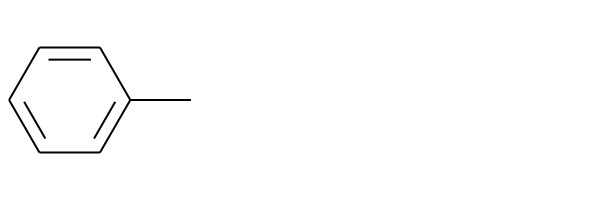

In [4]:
Draw.MolsToGridImage([mol])